In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import datetime
import holidays

us_holidays = holidays.UnitedStates()

In [2]:
# loading csv files 
cp = list(itertools.product([2014], range(1, 5)))
trip_data = [pd.read_csv('%dQ%d-capitalbikeshare-tripdata.csv' % (y, s)) for y, s in cp]

trip_df = pd.concat(trip_data, axis=0, ignore_index=True)

display(trip_df)
trip_df.info()

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,1716,2014-01-01 00:06:03,2014-01-01 00:34:40,31102,11th & Kenyon St NW,31632,15th & F St NE,W01363,Member
1,154,2014-01-01 00:11:09,2014-01-01 00:13:43,31602,Park Rd & Holmead Pl NW,31107,Lamont & Mt Pleasant NW,W01433,Member
2,318,2014-01-01 00:12:19,2014-01-01 00:17:38,31223,Convention Center / 7th & M St NW,31509,New Jersey Ave & R St NW,W00065,Member
3,480,2014-01-01 00:14:02,2014-01-01 00:22:02,31203,14th & Rhode Island Ave NW,31109,7th & T St NW,W20903,Member
4,345,2014-01-01 00:15:33,2014-01-01 00:21:18,31241,Thomas Circle,31600,5th & K St NW,W20888,Member
...,...,...,...,...,...,...,...,...,...
2913145,572,2014-12-31 23:45:46,2014-12-31 23:55:19,31239,Rhode Island & Connecticut Ave NW,31268,12th & U St NW,W21648,Member
2913146,433,2014-12-31 23:46:52,2014-12-31 23:54:05,31508,Gallaudet / 8th St & Florida Ave NE,31600,5th & K St NW,W00283,Member
2913147,1922,2014-12-31 23:48:01,2015-01-01 00:20:03,31249,Jefferson Memorial,31249,Jefferson Memorial,W01244,Member
2913148,557,2014-12-31 23:48:16,2014-12-31 23:57:34,31220,US Dept of State / Virginia Ave & 21st St NW,31258,Lincoln Memorial,W21494,Casual


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2913150 entries, 0 to 2913149
Data columns (total 9 columns):
Duration                int64
Start date              object
End date                object
Start station number    int64
Start station           object
End station number      int64
End station             object
Bike number             object
Member type             object
dtypes: int64(3), object(6)
memory usage: 200.0+ MB


In [3]:
# change type of date columns
trip_df['Start date'] = pd.to_datetime(trip_df['Start date'])
trip_df['End date'] = pd.to_datetime(trip_df['End date'])

# remove unused columns
trip_df = trip_df.drop(trip_df.columns[2:], axis=1)

# rename start date to date 
trip_df = trip_df.rename(columns={'Start date': 'Date'})

trip_df['Is Holiday'] = [dt in us_holidays for dt in trip_df['Date']]
trip_df['Is Weekend'] = [dt.weekday()>=5 for dt in trip_df['Date']]

display(trip_df)
trip_df.info()

,Duration,Date,Is Holiday,Is Weekend
0,1716,2014-01-01 00:06:03,True,False
1,154,2014-01-01 00:11:09,True,False
2,318,2014-01-01 00:12:19,True,False
3,480,2014-01-01 00:14:02,True,False
4,345,2014-01-01 00:15:33,True,False
...,...,...,...,...
2913145,572,2014-12-31 23:45:46,False,False
2913146,433,2014-12-31 23:46:52,False,False
2913147,1922,2014-12-31 23:48:01,False,False
2913148,557,2014-12-31 23:48:16,False,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2913150 entries, 0 to 2913149
Data columns (total 4 columns):
Duration      int64
Date          datetime64[ns]
Is Holiday    bool
Is Weekend    bool
dtypes: bool(2), datetime64[ns](1), int64(1)
memory usage: 50.0 MB


In [4]:
labels = ['%d-%d' % (n, n+1) for n in range(0, 23)]
categorical_duration = pd.cut(trip_df['Duration'], bins=range(0, 86400, 3600), include_lowest=True, labels=labels)
trip_df.insert(1, 'Categorical Duration', categorical_duration)
display(trip_df)

,Duration,Categorical Duration,Date,Is Holiday,Is Weekend
0,1716,0-1,2014-01-01 00:06:03,True,False
1,154,0-1,2014-01-01 00:11:09,True,False
2,318,0-1,2014-01-01 00:12:19,True,False
3,480,0-1,2014-01-01 00:14:02,True,False
4,345,0-1,2014-01-01 00:15:33,True,False
...,...,...,...,...,...
2913145,572,0-1,2014-12-31 23:45:46,False,False
2913146,433,0-1,2014-12-31 23:46:52,False,False
2913147,1922,0-1,2014-12-31 23:48:01,False,False
2913148,557,0-1,2014-12-31 23:48:16,False,False


In [21]:
cd_dist = trip_df.groupby(['Categorical Duration'])['Duration'].count() / trip_df.shape[0]
display(cd_dist)
print('%.2f of trip duration are less than 1 hour' % (cd_dist.head(1).sum()*100))
print(trip_df['Duration'].mean()/60)

Categorical Duration
0-1      0.961044
1-2      0.027659
2-3      0.007464
3-4      0.002061
4-5      0.000740
5-6      0.000320
6-7      0.000183
7-8      0.000094
8-9      0.000070
9-10     0.000058
10-11    0.000044
11-12    0.000043
12-13    0.000030
13-14    0.000021
14-15    0.000030
15-16    0.000023
16-17    0.000018
17-18    0.000017
18-19    0.000012
19-20    0.000012
20-21    0.000013
21-22    0.000015
22-23    0.000011
Name: Duration, dtype: float64

96.10 of trip duration are less than 1 hour
17.232799804335514


In [22]:
working_trip_df = trip_df[~(trip_df['Is Holiday'] | trip_df['Is Weekend'])]
working_cd_dist = working_trip_df.groupby(['Categorical Duration'])['Duration'].count() / working_trip_df.shape[0]
display(working_cd_dist)
print('%.2f of trip duration are less than 1 hour' % (working_cd_dist[:1].sum()*100))

Categorical Duration
0-1      0.975322
1-2      0.017331
2-3      0.004683
3-4      0.001342
4-5      0.000489
5-6      0.000201
6-7      0.000135
7-8      0.000091
8-9      0.000061
9-10     0.000058
10-11    0.000042
11-12    0.000043
12-13    0.000030
13-14    0.000020
14-15    0.000028
15-16    0.000021
16-17    0.000016
17-18    0.000017
18-19    0.000012
19-20    0.000012
20-21    0.000013
21-22    0.000012
22-23    0.000010
Name: Duration, dtype: float64

97.53 of trip duration are less than 1 hour


In [117]:
n_working_trip_df = trip_df[(trip_df['Is Holiday'] | trip_df['Is Weekend'])]
n_working_cd_dist = n_working_trip_df.groupby(['Categorical Duration'])['Duration'].count() / n_working_trip_df.shape[0]
display(n_working_cd_dist)
print('%.2f of trip duration are less than 1 hour' % (n_working_cd_dist.head(1).sum()*100))

Categorical Duration
0-1      0.929856
1-2      0.050218
2-3      0.013538
3-4      0.003633
4-5      0.001289
5-6      0.000579
6-7      0.000290
7-8      0.000103
8-9      0.000090
9-10     0.000059
10-11    0.000048
11-12    0.000042
12-13    0.000031
13-14    0.000023
14-15    0.000035
15-16    0.000030
16-17    0.000024
17-18    0.000017
18-19    0.000012
19-20    0.000013
20-21    0.000014
21-22    0.000023
22-23    0.000012
Name: Duration, dtype: float64

92.99 of trip duration are less than 1 hour


7.012231780768012

Duration
0-10 min     0.457896
10-20 min    0.324668
20-30 min    0.122522
30-40 min    0.030684
40-50 min    0.014810
50-60 min    0.010463
<1 hr        0.038956
Name: Duration, dtype: float64

Duration
0-10 min     0.491182
10-20 min    0.332283
20-30 min    0.111447
30-40 min    0.023300
40-50 min    0.010194
50-60 min    0.006916
<1 hr        0.024678
Name: Working Day, dtype: float64

Duration
0-10 min     0.385189
10-20 min    0.308034
20-30 min    0.146715
30-40 min    0.046812
40-50 min    0.024894
50-60 min    0.018212
<1 hr        0.070144
Name: Not Working Day, dtype: float64

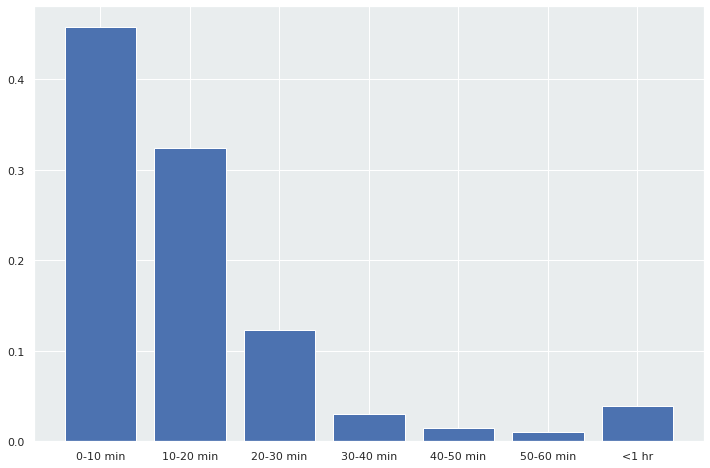

In [238]:
bins=[0, 600, 1200, 1800, 2400, 3000, 3600, 86400]
labels=['0-10 min', '10-20 min', '20-30 min', '30-40 min', '40-50 min', '50-60 min', '<1 hr']

d_dist = trip_df.groupby(pd.cut(trip_df['Duration'], bins=bins, include_lowest=True, labels=labels))['Duration'].count() / trip_df.shape[0]
display(d_dist)

plt.figure(figsize=(12, 8))
plt.bar(d_dist.index, d_dist)

working_d_dist = working_trip_df.groupby(pd.cut(working_trip_df['Duration'], bins=bins, include_lowest=True, labels=labels))['Duration'].count() / working_trip_df.shape[0]
working_d_dist.name = 'Working Day'
display(working_d_dist)

n_working_d_dist = n_working_trip_df.groupby(pd.cut(n_working_trip_df['Duration'], bins=bins, include_lowest=True, labels=labels))['Duration'].count() / n_working_trip_df.shape[0]
n_working_d_dist.name = 'Not Working Day'
display(n_working_d_dist)

agg_d_dist = working_d_dist.to_frame().join(n_working_d_dist.to_frame())

# plt.figure(figsize=(8, 12))
# plt.plot(agg_d_dist.columns, agg_d_dist.T, 'o-')
# plt.legend(labels)
# plt.show()

In [119]:
print('Average of trip duration in Business days: %.2f min' % (working_trip_df['Duration'].mean()/60))
print('Average of trip duration in Non-Business days: %.2f min' % (n_working_trip_df['Duration'].mean()/60))
print(n_working_trip_df['Duration'].mean() / working_trip_df['Duration'].mean() - 1)

Average of trip duration in Business days: 15.01 min
Average of trip duration in Non-Business days: 22.09 min
0.47204921186280124


In [33]:
# ratio_cd_dist = n_working_cd_dist / working_cd_dist
# plt.figure(figsize=(16, 8))
# plt.plot(ratio_cd_dist.index, ratio_cd_dist, 'o-')
# plt.show()

In [209]:
# plt.figure(figsize=(16, 8))
# n, x, _ = plt.hist(trip_df['Date'].dt.hour, bins=range(24),
#                    label='Start Time', density=True)
# bin_centers = 0.5*(x[1:]+x[:-1])
# plt.plot(bin_centers, n, 'o-')
# plt.xticks(range(24))
# plt.legend()
# plt.show()
plt.rcParams['axes.facecolor'] = '#e9edee'

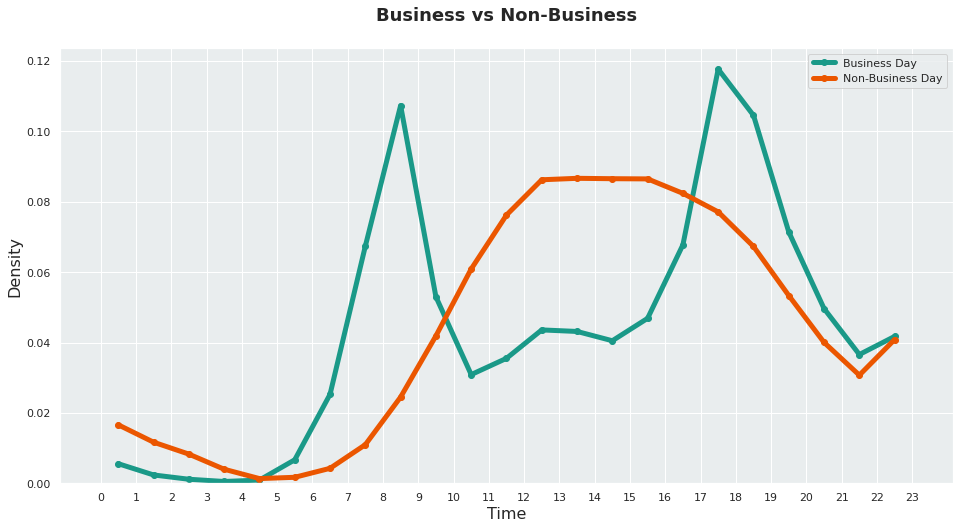

In [239]:
plt.figure(figsize=(16, 8))
n1, x1, _ = plt.hist(working_trip_df['Date'].dt.hour, bins=range(24), density=True, alpha=0.0)
bin_centers1 = 0.5*(x1[1:]+x1[:-1])
plt.plot(bin_centers1, n1, 'o-', label='Business Day', color='#1a9988', linewidth=5)
n2, x2, _ = plt.hist(n_working_trip_df['Date'].dt.hour, bins=range(24), density=True, alpha=0.0)
bin_centers2 = 0.5*(x2[1:]+x2[:-1])
plt.plot(bin_centers2, n2, 'o-', label='Non-Business Day', color='#eb5600', linewidth=5)

plt.xticks(range(24))
plt.xlabel('Time', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.title('Business vs Non-Business', fontweight='bold', fontsize=18, y=1.05)
plt.legend()
plt.savefig('Business vs Non-Business.png')
plt.show()

In [ ]:
# ss = working_trip_df.groupby(by=['Start station'])['Duration'].count() / working_trip_df.shape[0] * 100
# es = working_trip_df.groupby(by=['End station'])['Duration'].count() / working_trip_df.shape[0] * 100

# plt.figure(figsize=(16, 8))
# plt.bar(ss.sort_values().tail(5).index, ss.sort_values().tail(5), label='Start Station', alpha=0.8)
# plt.bar(es.sort_values().tail(5).index, es.sort_values().tail(5), label='End Station', alpha=0.8)
# plt.legend()

In [63]:
# weekdaily = trip_df.groupby(trip_df['Date'].dt.weekday_name)['Duration'].count() / trip_df.shape[0]
# weekdaily.name = 'Count'

# plt.figure(figsize=(12, 8))
# plt.bar(weekdaily.index, weekdaily)
# plt.show()

In [110]:
daily = trip_df.groupby(by=[pd.Grouper(key='Date', freq='D')])['Duration'].count()
daily.name = 'Count'

working_daily = working_trip_df.groupby(by=[pd.Grouper(key='Date', freq='D')])['Duration'].count()
working_daily.name = 'Count'
working_daily_df = working_daily.to_frame()
working_daily_df = working_daily_df[working_daily_df!=0].dropna()
display(working_daily_df)

n_working_daily = n_working_trip_df.groupby(by=[pd.Grouper(key='Date', freq='D')])['Duration'].count()
n_working_daily.name = 'Count'
n_working_daily_df = n_working_daily.to_frame()
n_working_daily_df = n_working_daily_df[n_working_daily_df!=0].dropna()
display(n_working_daily_df)

# avg_wday = working_daily_df.mean()
# avg_nwday = n_working_daily_df.mean()
# impact_wday = (avg_wday/avg_nwday-1)*100
# print('Being in working day decrease load %.2f'%impact_wday)

,Count
Date,
2014-01-02,3316.0
2014-01-03,1608.0
2014-01-06,3507.0
2014-01-07,2282.0
2014-01-08,3855.0
...,...
2014-12-24,1212.0
2014-12-26,2911.0
2014-12-29,5142.0


,Count
Date,
2014-01-01,3011.0
2014-01-04,2242.0
2014-01-05,2060.0
2014-01-11,1955.0
2014-01-12,5413.0
...,...
2014-12-20,3847.0
2014-12-21,3552.0
2014-12-25,1635.0


Date
2014-03-31    0.137694
2014-06-30    0.306479
2014-09-30    0.333879
2014-12-31    0.221949
Freq: Q-DEC, Name: Count, dtype: float64

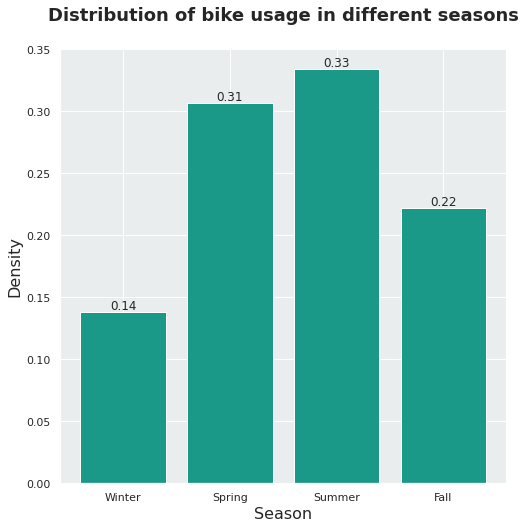

In [220]:
seasonly = trip_df.groupby(by=[pd.Grouper(key='Date', freq='Q')])['Duration'].count() / trip_df.shape[0]
seasonly.name = 'Count'
display(seasonly)

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., height,
                '%.2f' % float(height),
                ha='center', va='bottom')

plt.figure(figsize=(8, 8))
rects = plt.bar(['Winter', 'Spring', 'Summer', 'Fall'], seasonly, color='#1a9988')
autolabel(rects)

plt.title('Distribution of bike usage in different seasons', fontweight='bold', fontsize=18, y=1.05)
plt.xlabel('Season', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.savefig('Distribution of bike usage in different seasons.png')
plt.show()

In [66]:
hourly_weather_df = pd.read_csv('weather-data.csv')
hourly_weather_df['Date'] = pd.to_datetime(hourly_weather_df['Date'])

# categorical_humidity = pd.cut(hourly_weather_df['Rel. Humidity'],
#                               bins=[25, 50, 75, 100], include_lowest=True, labels=[1, 2, 3])
# hourly_weather_df.insert(6, 'Categorical Humidity', categorical_humidity)

display(hourly_weather_df)
hourly_weather_df.info()

,Date,Time,Temperature,Relative Temperature,Wind,Rel. Humidity
0,2014-01-01,0,1.0,1.0,0.0,48.0
1,2014-01-01,1,-1.0,-5.0,13.0,59.0
2,2014-01-01,2,-1.0,-3.0,6.0,59.0
3,2014-01-01,3,1.0,1.0,0.0,48.0
4,2014-01-01,4,-1.0,-1.0,0.0,64.0
...,...,...,...,...,...,...
17515,2015-12-31,19,9.0,6.0,22.0,66.0
17516,2015-12-31,20,9.0,6.0,17.0,62.0
17517,2015-12-31,21,8.0,4.0,28.0,62.0
17518,2015-12-31,22,8.0,5.0,15.0,62.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 6 columns):
Date                    17520 non-null datetime64[ns]
Time                    17520 non-null int64
Temperature             17520 non-null float64
Relative Temperature    17520 non-null float64
Wind                    17520 non-null float64
Rel. Humidity           17520 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 821.4 KB


In [67]:
hourly = trip_df.groupby(by=[pd.Grouper(key='Date', freq='H')])['Duration'].count()
hourly.name = 'Count'
display(hourly)

Date
2014-01-01 00:00:00     67
2014-01-01 01:00:00    104
2014-01-01 02:00:00    121
2014-01-01 03:00:00     64
2014-01-01 04:00:00     10
                      ... 
2014-12-31 19:00:00    162
2014-12-31 20:00:00    102
2014-12-31 21:00:00     84
2014-12-31 22:00:00     79
2014-12-31 23:00:00     33
Freq: H, Name: Count, Length: 8760, dtype: int64

In [107]:
df = hourly.to_frame().merge(hourly_weather_df,
                   left_on=[hourly.index.date.astype('datetime64[ns]'), hourly.index.hour],
                   right_on=['Date', 'Time'])

display(df)
df.info()

,Count,Date,Time,Temperature,Relative Temperature,Wind,Rel. Humidity
0,67,2014-01-01,0,1.0,1.0,0.0,48.0
1,104,2014-01-01,1,-1.0,-5.0,13.0,59.0
2,121,2014-01-01,2,-1.0,-3.0,6.0,59.0
3,64,2014-01-01,3,1.0,1.0,0.0,48.0
4,10,2014-01-01,4,-1.0,-1.0,0.0,64.0
...,...,...,...,...,...,...,...
8755,162,2014-12-31,19,1.0,-1.0,6.0,41.0
8756,102,2014-12-31,20,1.0,-1.0,6.0,38.0
8757,84,2014-12-31,21,1.0,-2.0,9.0,41.0
8758,79,2014-12-31,22,-1.0,-4.0,9.0,55.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 0 to 8759
Data columns (total 7 columns):
Count                   8760 non-null int64
Date                    8760 non-null datetime64[ns]
Time                    8760 non-null int64
Temperature             8760 non-null float64
Relative Temperature    8760 non-null float64
Wind                    8760 non-null float64
Rel. Humidity           8760 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 547.5 KB


In [108]:
# ch_dist = df.groupby(['Categorical Humidity'])['Count'].sum() / df['Count'].sum()
# display(ch_dist)

# plt.figure(figsize=(8, 8))
# plt.bar(ch_dist.index, ch_dist)

In [109]:
df[['Count', 'Temperature', 'Relative Temperature', 'Wind', 'Rel. Humidity']].corr()

,Count,Temperature,Relative Temperature,Wind,Rel. Humidity
Count,1.000000,0.476113,0.459132,0.087675,-0.354250
Temperature,0.476113,1.000000,0.993896,-0.077096,0.063458
Relative Temperature,0.459132,0.993896,1.000000,-0.133517,0.091391
Wind,0.087675,-0.077096,-0.133517,1.000000,-0.252095
Rel. Humidity,-0.354250,0.063458,0.091391,-0.252095,1.000000


In [120]:
daily_weather_df = hourly_weather_df.groupby(['Date']).mean()

daily_weather_df = daily_weather_df.drop(['Time'], axis=1)

# categorical_humidity = pd.cut(daily_weather_df['Rel. Humidity'],
#                               bins=[25, 50, 75, 100], include_lowest=True, labels=[1, 2, 3])
# daily_weather_df.insert(4, 'Categorical Humidity', categorical_humidity)

display(daily_weather_df)
daily_weather_df.info()

,Temperature,Relative Temperature,Wind,Rel. Humidity
Date,,,,
2014-01-01,3.708333,2.125000,7.250000,57.916667
2014-01-02,2.291667,-0.666667,11.041667,81.375000
2014-01-03,-5.333333,-12.583333,26.208333,52.458333
2014-01-04,-3.041667,-6.833333,11.666667,51.875000
2014-01-05,3.083333,1.083333,7.500000,79.291667
...,...,...,...,...
2015-12-27,15.666667,15.666667,18.041667,90.708333
2015-12-28,7.708333,4.625000,22.833333,70.791667
2015-12-29,9.375000,8.083333,9.791667,91.166667


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 730 entries, 2014-01-01 to 2015-12-31
Data columns (total 4 columns):
Temperature             730 non-null float64
Relative Temperature    730 non-null float64
Wind                    730 non-null float64
Rel. Humidity           730 non-null float64
dtypes: float64(4)
memory usage: 28.5 KB


In [121]:
daily = trip_df.groupby(by=[pd.Grouper(key='Date', freq='D')])['Duration'].count()
daily.name = 'Count'
display(daily)

Date
2014-01-01    3011
2014-01-02    3316
2014-01-03    1608
2014-01-04    2242
2014-01-05    2060
              ... 
2014-12-27    4181
2014-12-28    2861
2014-12-29    5142
2014-12-30    5162
2014-12-31    4209
Freq: D, Name: Count, Length: 365, dtype: int64

In [122]:
df2 = daily.to_frame().merge(daily_weather_df,
                   left_on=[daily.index.date.astype('datetime64[ns]')],
                   right_index=True)

df2 = df2.drop(['key_0'], axis=1)
display(df2)
df.info()

,Count,Temperature,Relative Temperature,Wind,Rel. Humidity
Date,,,,,
2014-01-01,3011,3.708333,2.125000,7.250000,57.916667
2014-01-02,3316,2.291667,-0.666667,11.041667,81.375000
2014-01-03,1608,-5.333333,-12.583333,26.208333,52.458333
2014-01-04,2242,-3.041667,-6.833333,11.666667,51.875000
2014-01-05,2060,3.083333,1.083333,7.500000,79.291667
...,...,...,...,...,...
2014-12-27,4181,8.083333,7.500000,3.791667,62.708333
2014-12-28,2861,11.333333,10.916667,8.291667,64.291667
2014-12-29,5142,7.041667,5.125000,10.625000,55.750000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 0 to 8759
Data columns (total 7 columns):
Count                   8760 non-null int64
Date                    8760 non-null datetime64[ns]
Time                    8760 non-null int64
Temperature             8760 non-null float64
Relative Temperature    8760 non-null float64
Wind                    8760 non-null float64
Rel. Humidity           8760 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 547.5 KB


In [123]:
# ch_dist = df2.groupby(['Categorical Humidity'])['Count'].sum() / df2['Count'].sum()
# display(ch_dist)

# plt.figure(figsize=(8, 8))
# plt.bar(ch_dist.index, ch_dist)

In [124]:
df2[['Count', 'Temperature', 'Relative Temperature', 'Wind', 'Rel. Humidity']].corr()

,Count,Temperature,Relative Temperature,Wind,Rel. Humidity
Count,1.000000,0.819919,0.814332,-0.210912,-0.083225
Temperature,0.819919,1.000000,0.996867,-0.217260,0.288603
Relative Temperature,0.814332,0.996867,1.000000,-0.254387,0.305439
Wind,-0.210912,-0.217260,-0.254387,1.000000,-0.227279
Rel. Humidity,-0.083225,0.288603,0.305439,-0.227279,1.000000


In [241]:
seasons_df = []
for s in range(1, 5):
    seasons_df.append(df2.loc[(df2.index.month // 3 + 1)==s])

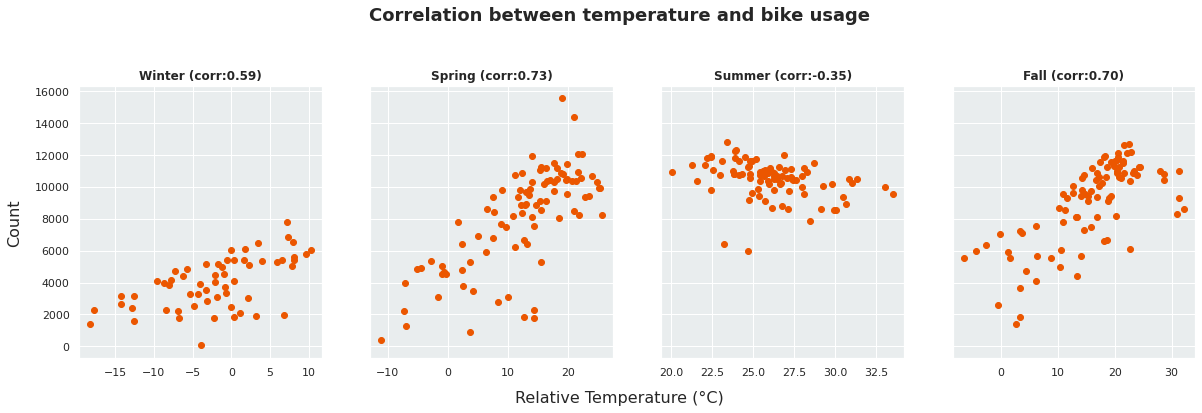

In [228]:
sl = ['Winter', 'Spring', 'Summer', 'Fall']

fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 5), sharey=True)
plt.suptitle('Correlation between temperature and bike usage', fontweight='bold', fontsize=18, y=1.1)
fig.text(0.5, 0, 'Relative Temperature (°C)', ha='center', fontsize=16)
fig.text(0.075, 0.5, 'Count', va='center', rotation='vertical', fontsize=16)
for s in range(len(seasons_df)):
    corr = seasons_df[s][['Count', 'Relative Temperature']].corr().loc['Count', 'Relative Temperature']
    axs[s].set_title('%s (corr:%.2f)' % (sl[s],corr), fontweight='bold')
    axs[s].scatter(seasons_df[s]['Relative Temperature'], seasons_df[s]['Count'], color='#eb5600')
    
plt.savefig('Correlation between temperature and bike usage.png', bbox_inches='tight')

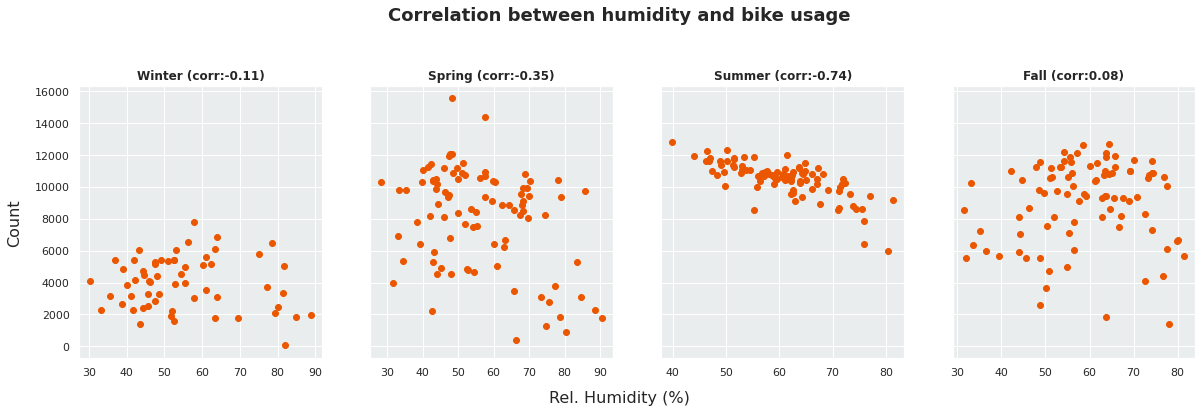

In [229]:
sl = ['Winter', 'Spring', 'Summer', 'Fall']

fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 5), sharey=True)
plt.suptitle('Correlation between humidity and bike usage', fontweight='bold', fontsize=18, y=1.1)
fig.text(0.5, 0, 'Rel. Humidity (%)', ha='center', fontsize=16)
fig.text(0.075, 0.5, 'Count', va='center', rotation='vertical', fontsize=16)
for s in range(len(seasons_df)):
    corr = seasons_df[s][['Count', 'Rel. Humidity']].corr().loc['Count', 'Rel. Humidity']
    axs[s].set_title('%s (corr:%.2f)' % (sl[s],corr), fontweight='bold')
    axs[s].scatter(seasons_df[s]['Rel. Humidity'], seasons_df[s]['Count'], color='#eb5600')

plt.savefig('Correlation between humidity and bike usage.png', bbox_inches='tight')

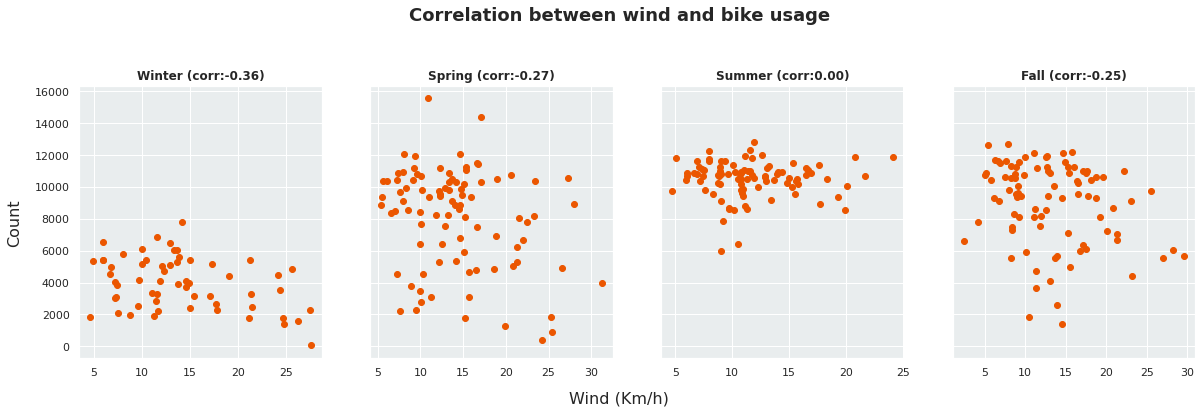

In [230]:
sl = ['Winter', 'Spring', 'Summer', 'Fall']

fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 5), sharey=True)
plt.suptitle('Correlation between wind and bike usage', fontweight='bold', fontsize=18, y=1.1)
fig.text(0.5, 0, 'Wind (Km/h)', ha='center', fontsize=16)
fig.text(0.075, 0.5, 'Count', va='center', rotation='vertical', fontsize=16)
for s in range(len(seasons_df)):
    corr = seasons_df[s][['Count', 'Wind']].corr().loc['Count', 'Wind']
    axs[s].set_title('%s (corr:%.2f)' % (sl[s],corr), fontweight='bold')
    axs[s].scatter(seasons_df[s]['Wind'], seasons_df[s]['Count'], color='#eb5600')
    
plt.savefig('Correlation between wind and bike usage.png', bbox_inches='tight')

In [232]:
t_df = trip_df.merge(hourly_weather_df,
              left_on=[trip_df['Date'].dt.date.astype('datetime64[ns]'), trip_df['Date'].dt.hour],
              right_on=['Date', 'Time'])

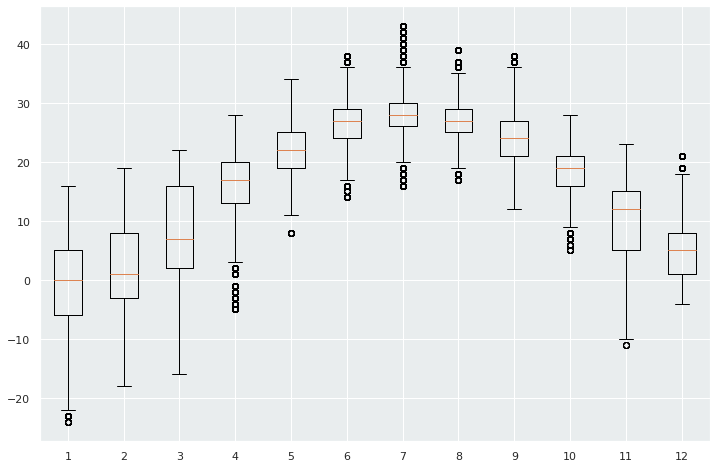

In [234]:
plt.figure(figsize=(12, 8))
plt.boxplot([t_df.loc[t_df['Date'].dt.month==m, 'Relative Temperature'] for m in range(1, 13)])
plt.show()

In [ ]:
# plt.figure(figsize=(12, 8))
# plt.violinplot([t_df.loc[t_df['Date'].dt.month==m, 'Rel. Humidity'] for m in range(1, 13)])
# plt.show()

In [ ]:
# plt.figure(figsize=(12, 8))
# plt.plot(df2.index[:45], df2['Count'][:45])
# plt.grid()
# plt.show()

In [ ]:
# diff_df = df2 / df2.shift(periods=1)

# plt.figure(figsize=(12, 8))
# plt.plot(diff_df.index[:20], diff_df['Count'].head(20))

In [ ]:
# plt.figure(figsize=(12, 8))
# plt.plot(diff_df.index[:20], diff_df['Relative Temperature'][:20])
# plt.plot(diff_df.index[:20], diff_df['Rel. Humidity'][:20], label='Humidity')
# plt.plot(diff_df.index[:20], diff_df['Wind'][:20])

# plt.legend()

In [ ]:
# plt.figure(figsize=(12, 8))
# plt.plot(df2.index[:20], df2['Relative Temperature'][:20], label='Relative Temperature')
# plt.plot(df2.index[:20], df2['Rel. Humidity'][:20], label='Rel. Humidity')
# plt.grid()
# plt.legend()
# plt.show()